In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.metrics import accuracy_score 

In [26]:
df = pd.read_csv("Spotify_Dataset_V3.csv", delimiter = ";")
df.head(10)

Rank              Title                     Artists        Date  \
0     1    Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     1    Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
2     2     WHERE SHE GOES                   Bad Bunny  29/05/2023   
3     3    La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
4     3    La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
5     4  Cupid - Twin Ver.                 FIFTY FIFTY  29/05/2023   
6     5          un x100to   Grupo Frontera, Bad Bunny  29/05/2023   
7     5          un x100to   Grupo Frontera, Bad Bunny  29/05/2023   
8     6            Flowers                 Miley Cyrus  29/05/2023   
9     7           Daylight               David Kushner  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
4         0.812   0.479   -5678.0        0.333         0.213   
5         0.783   0.592   -8332.0        0.033         0.435   
6         0.569   0.724   -4076.0        0.047         0.228   
7         0.569   0.724   -4076.0        0.047         0.228   
8         0.707   0.681   -4325.0        0.067         0.063   
9         0.508   0.430   -9475.0        0.034         0.830   

   Instrumentalness  Valence # of Artist   Artist (Ind.) # of Nationality  \
0             0.000    0.834    Artist 1  Eslabon Armado    Nationality 1   
1             0.000    0.834    Artist 2      Peso Pluma    Nationality 2   
2             0.629    0.234    Artist 1       Bad Bunny    Nationality 1   
3             0.000    0.559    Artist 1       Yng Lvcas    Nationality 1   
4             0.000    0.559    Artist 2      Peso Pluma    Nationality 2   
5             0.000    0.726    Artist 1     FIFTY FIFTY    Nationality 1   
6             0.000    0.562    Artist 1  Grupo Frontera    Nationality 1   
7             0.000    0.562    Artist 2       Bad Bunny    Nationality 2   
8             0.000    0.646    Artist 1     Miley Cyrus    Nationality 1   
9             0.000    0.324    Artist 1   David Kushner    Nationality 1   

     Nationality      Continent  Points (Total)  \
0         Mexico  Latin-America             200   
1         Mexico  Latin-America             200   
2    Puerto Rico  Latin-America             199   
3         Mexico  Latin-America             198   
4         Mexico  Latin-America             198   
5    South Korea           Asia             197   
6         Mexico  Latin-America             196   
7    Puerto Rico  Latin-America             196   
8  United States  Anglo-America             195   
9  United States  Anglo-America             194   

   Points (Ind for each Artist/Nat)                      id  \
0                             100.0  3qQbCzHBycnDpGskqOWY0E   
1                             100.0  3qQbCzHBycnDpGskqOWY0E   
2                             199.0  7ro0hRteUMfnOioTFI5TG1   
3                              99.0  2UW7JaomAMuX9pZrjVpHAU   
4                              99.0  2UW7JaomAMuX9pZrjVpHAU   
5                             197.0  7FbrGaHYVDmfr7KoLIZnQ7   
6                              98.0  6pD0ufEQq0xdHSsRbg9LBK   
7                              98.0  6pD0ufEQq0xdHSsRbg9LBK   
8                             195.0  4DHcnVTT87F0zZhRPYmZ3B   
9                             194.0  1odExI7RdWc4BT515LTAwj   

                                            Song URL  
0  https://open.spotify.com/track/3qQbCzHBycnDpGs...  
1  https://open.spotify.com/track/3qQbCzHBycnDpGs...  
2  https://open.spotify.com/track/7ro0hRteUMfnOio...  
3  https://open.spotify.com/track/2UW7JaomAMuX9pZ...  
4  https://open.spotify.com/track/2UW7JaomAMuX9pZ...  
5  https://open.spotify.com/track/7FbrGaHYVDmfr7K...  
6  https://open.spotify.com/track/6pD0

In [27]:
df.shape

(651936, 20)

In [28]:
df = df.drop_duplicates(subset = ['Title', 'Artists', 'Date'], keep = 'first')
df = df.reset_index(drop = True)

In [31]:
count_df = df.groupby(['Title', 'Artists'])['Points (Total)'].agg(['count', 'sum']).reset_index()
count_df.columns = ['Title', 'Artists', 'Count', 'Sum']

result_df = df.merge(count_df, on=['Title', 'Artists'], how='left')
result_df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          2                 WHERE SHE GOES                   Bad Bunny   
2          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
3          4              Cupid - Twin Ver.                 FIFTY FIFTY   
4          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
470400   196                  White Iverson                 Post Malone   
470401   197                        Oh Lord                   MiC LOWRY   
470402   198  Superstition - Single Version               Stevie Wonder   
470403   199                        Secrets                  The Weeknd   
470404   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
1       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
2       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
3       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
4       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
470400  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
470401  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
470402  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
470403  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
470404  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  ...   Artist (Ind.) # of Nationality  \
0                  0.000  ...  Eslabon Armado    Nationality 1   
1                  0.629  ...       Bad Bunny    Nationality 1   
2                  0.000  ...       Yng Lvcas    Nationality 1   
3                  0.000  ...     FIFTY FIFTY    Nationality 1   
4                  0.000  ...  Grupo Frontera    Nationality 1   
...                  ...  ...             ...              ...   
470400             0.000  ...     Post Malone    Nationality 1   
470401             0.000  ...       MiC LOWRY    Nationality 1   
470402             0.004  ...   Stevie Wonder    Nationality 1   
470403             0.000  ...      The Weeknd    Nationality 1   
470404             0.000  ...           JAY-Z    Nationality 1   

           Nationality      Continent Points (Total)  \
0               Mexico  Latin-America            200   
1          Puerto Rico  Latin-America            199   
2               Mexico  Latin-America            198   
3          South Korea           Asia            197   
4               Mexico  Latin-America            196   
...                ...            ...            ...   
470400   United States  Anglo-America              5   
470401  United Kingdom         Europe              4   
470402   United States  Anglo-America              3   
470403          Canada  Anglo-America              2   
470404   United States  Anglo-America              1   

       Points (Ind for each Artist/Nat)                      id  \
0                                 100.0  3qQbCzHBycnDpGskqOWY0E   
1                                 199.0  7ro0hRteUMfnOioTFI5TG1   
2                                  99.0  2UW7JaomAMuX9pZrjVpHAU   
3                                 197.0  7FbrGaHYVDmfr7KoLIZnQ7   
4                                  98.0  6pD0ufEQq0xdHSsRbg9LBK   
...                                 ...                     ...   
470400                              5.0  6eT7xZZlB2mwyzJ2sUKG6w   
470401                              4.0  1sTUEdVO85YU8Ymk2jeAls   
470402                              3.0  5lXcSvHRVjQJ3LB2rLKQog  

In [32]:
result_df.shape

(470405, 22)

In [23]:
total = 0
for index, row in result_df.iterrows():
    if df.iloc[index]['Title'] == "Ella Baila Sola":
        total = total + df.iloc[index]["Points (Total)"]
    
total

14624

In [37]:
result_df_copy = result_df.copy()
result_df["Mean"] = result_df_copy["Sum"] / result_df_copy['Count']
    
result_df.head(10)

Rank              Title                     Artists        Date  \
0     1    Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     2     WHERE SHE GOES                   Bad Bunny  29/05/2023   
2     3    La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
3     4  Cupid - Twin Ver.                 FIFTY FIFTY  29/05/2023   
4     5          un x100to   Grupo Frontera, Bad Bunny  29/05/2023   
5     6            Flowers                 Miley Cyrus  29/05/2023   
6     7           Daylight               David Kushner  29/05/2023   
7     8          Kill Bill                         SZA  29/05/2023   
8     9          As It Was                Harry Styles  29/05/2023   
9    10                TQG            KAROL G, Shakira  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.652   0.800   -4019.0        0.061         0.143   
2         0.812   0.479   -5678.0        0.333         0.213   
3         0.783   0.592   -8332.0        0.033         0.435   
4         0.569   0.724   -4076.0        0.047         0.228   
5         0.707   0.681   -4325.0        0.067         0.063   
6         0.508   0.430   -9475.0        0.034         0.830   
7         0.644   0.735   -5747.0        0.039         0.052   
8         0.520   0.731   -5338.0        0.056         0.342   
9         0.720   0.630   -3547.0        0.277         0.673   

   Instrumentalness  ...  # of Nationality     Nationality      Continent  \
0             0.000  ...     Nationality 1          Mexico  Latin-America   
1             0.629  ...     Nationality 1     Puerto Rico  Latin-America   
2             0.000  ...     Nationality 1          Mexico  Latin-America   
3             0.000  ...     Nationality 1     South Korea           Asia   
4             0.000  ...     Nationality 1          Mexico  Latin-America   
5             0.000  ...     Nationality 1   United States  Anglo-America   
6             0.000  ...     Nationality 1   United States  Anglo-America   
7             0.144  ...     Nationality 1   United States  Anglo-America   
8             0.001  ...     Nationality 1  United Kingdom         Europe   
9             0.000  ...     Nationality 1        Colombia  Latin-America   

  Points (Total) Points (Ind for each Artist/Nat)                      id  \
0            200                            100.0  3qQbCzHBycnDpGskqOWY0E   
1            199                            199.0  7ro0hRteUMfnOioTFI5TG1   
2            198                             99.0  2UW7JaomAMuX9pZrjVpHAU   
3            197                            197.0  7FbrGaHYVDmfr7KoLIZnQ7   
4            196                             98.0  6pD0ufEQq0xdHSsRbg9LBK   
5            195                            195.0  4DHcnVTT87F0zZhRPYmZ3B   
6            194                            194.0  1odExI7RdWc4BT515LTAwj   
7            193                            193.0  1Qrg8KqiBpW07V7PNxwwwL   
8            192                            192.0  4Dvkj6JhhA12EX05fT7y2e   
9            191                             95.5  0DWdj2oZMBFSzRsi2Cvfzf   

                                            Song URL  Count    Sum        Mean  
0  https://open.spotify.com/track/3qQbCzHBycnDpGs...     74  14624  197.621622  
1  https://open.spotify.com/track/7ro0hRteUMfnOio...     11   2188  198.909091  
2  https://open.spotify.com/track/2UW7JaomAMuX9pZ...     73  13806  189.123288  
3  https://open.spotify.com/track/7FbrGaHYVDmfr7K...     78  13467  172.653846  
4  https://open.spotify.com/track/6pD0ufEQq0xdHSs...     43   8559  199.046512  
5  https://open.spotify.com/track/4DHcnVTT87F0zZh...    137  27211  198.620438  
6  https://open.spotify.com/track/1odExI7RdWc4BT5...     46   8924  194.000000  
7  https://open.spotify.com/track/1Qrg8KqiBpW07V7...    172  33857  196.843023  
8  https://open.spotify.com/track/4Dvkj6JhhA12EX0...    425  83267  195.922353  
9  https://open.spoti

In [39]:
scaler = StandardScaler()

columns_to_standardize = result_df.iloc[:, 4:10]

result_df.iloc[:, 4:10] = scaler.fit_transform(columns_to_standardize)

result_df.head(10)

Rank              Title                     Artists        Date  \
0     1    Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     2     WHERE SHE GOES                   Bad Bunny  29/05/2023   
2     3    La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
3     4  Cupid - Twin Ver.                 FIFTY FIFTY  29/05/2023   
4     5          un x100to   Grupo Frontera, Bad Bunny  29/05/2023   
5     6            Flowers                 Miley Cyrus  29/05/2023   
6     7           Daylight               David Kushner  29/05/2023   
7     8          Kill Bill                         SZA  29/05/2023   
8     9          As It Was                Harry Styles  29/05/2023   
9    10                TQG            KAROL G, Shakira  29/05/2023   

   Danceability    Energy  Loudness  Speechiness  Acousticness  \
0     -0.148030  0.750058  0.114829    -0.765643      1.009480   
1     -0.263892  1.011519  0.517961    -0.479843     -0.392264   
2      0.894730 -0.986791 -0.060083     2.296505     -0.103670   
3      0.684730 -0.283336 -0.984813    -0.765643      0.811587   
4     -0.864927  0.538399  0.498101    -0.622743     -0.041828   
5      0.134384  0.270713  0.411342    -0.418600     -0.722086   
6     -1.306652 -1.291829 -1.383068    -0.755436      2.440083   
7     -0.321823  0.606877 -0.084124    -0.704400     -0.767437   
8     -1.219755  0.581976  0.058383    -0.530879      0.428168   
9      0.228522 -0.046776  0.682420     1.724904      1.792807   

   Instrumentalness  ...  # of Nationality     Nationality      Continent  \
0         -0.150942  ...     Nationality 1          Mexico  Latin-America   
1         10.457319  ...     Nationality 1     Puerto Rico  Latin-America   
2         -0.150942  ...     Nationality 1          Mexico  Latin-America   
3         -0.150942  ...     Nationality 1     South Korea           Asia   
4         -0.150942  ...     Nationality 1          Mexico  Latin-America   
5         -0.150942  ...     Nationality 1   United States  Anglo-America   
6         -0.150942  ...     Nationality 1   United States  Anglo-America   
7          2.277658  ...     Nationality 1   United States  Anglo-America   
8         -0.134077  ...     Nationality 1  United Kingdom         Europe   
9         -0.150942  ...     Nationality 1        Colombia  Latin-America   

  Points (Total) Points (Ind for each Artist/Nat)                      id  \
0            200                            100.0  3qQbCzHBycnDpGskqOWY0E   
1            199                            199.0  7ro0hRteUMfnOioTFI5TG1   
2            198                             99.0  2UW7JaomAMuX9pZrjVpHAU   
3            197                            197.0  7FbrGaHYVDmfr7KoLIZnQ7   
4            196                             98.0  6pD0ufEQq0xdHSsRbg9LBK   
5            195                            195.0  4DHcnVTT87F0zZhRPYmZ3B   
6            194                            194.0  1odExI7RdWc4BT515LTAwj   
7            193                            193.0  1Qrg8KqiBpW07V7PNxwwwL   
8            192                            192.0  4Dvkj6JhhA12EX05fT7y2e   
9            191                             95.5  0DWdj2oZMBFSzRsi2Cvfzf   

                                            Song URL  Count    Sum        Mean  
0  https://open.spotify.com/track/3qQbCzHBycnDpGs...     74  14624  197.621622  
1  https://open.spotify.com/track/7ro0hRteUMfnOio...     11   2188  198.909091  
2  https://open.spotify.com/track/2UW7JaomAMuX9pZ...     73  13806  189.123288  
3  https://open.spotify.com/track/7FbrGaHYVDmfr7K...     78  13467  172.653846  
4  https://open.spotify.com/track/6pD0ufEQq0xdHSs...     43   8559  199.046512  
5  https://open.spotify.com/track/4DHcnVTT87F0zZh...    137  27211  198.620438  
6  https://open.spotify.com/track/1odExI7RdWc4BT5...     46   8924  194.000000  
7  https://open.spotify.com/track/1Qrg8KqiBpW07V7...    172  33857  196.843023  
8  https://open.spotify.com/track/4Dvkj6JhhA12EX0...    425  83267  195.922353  

# Linear Regression

In [44]:
target = 'Mean'
predictors = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness']
X = result_df[predictors]
y = result_df[target]

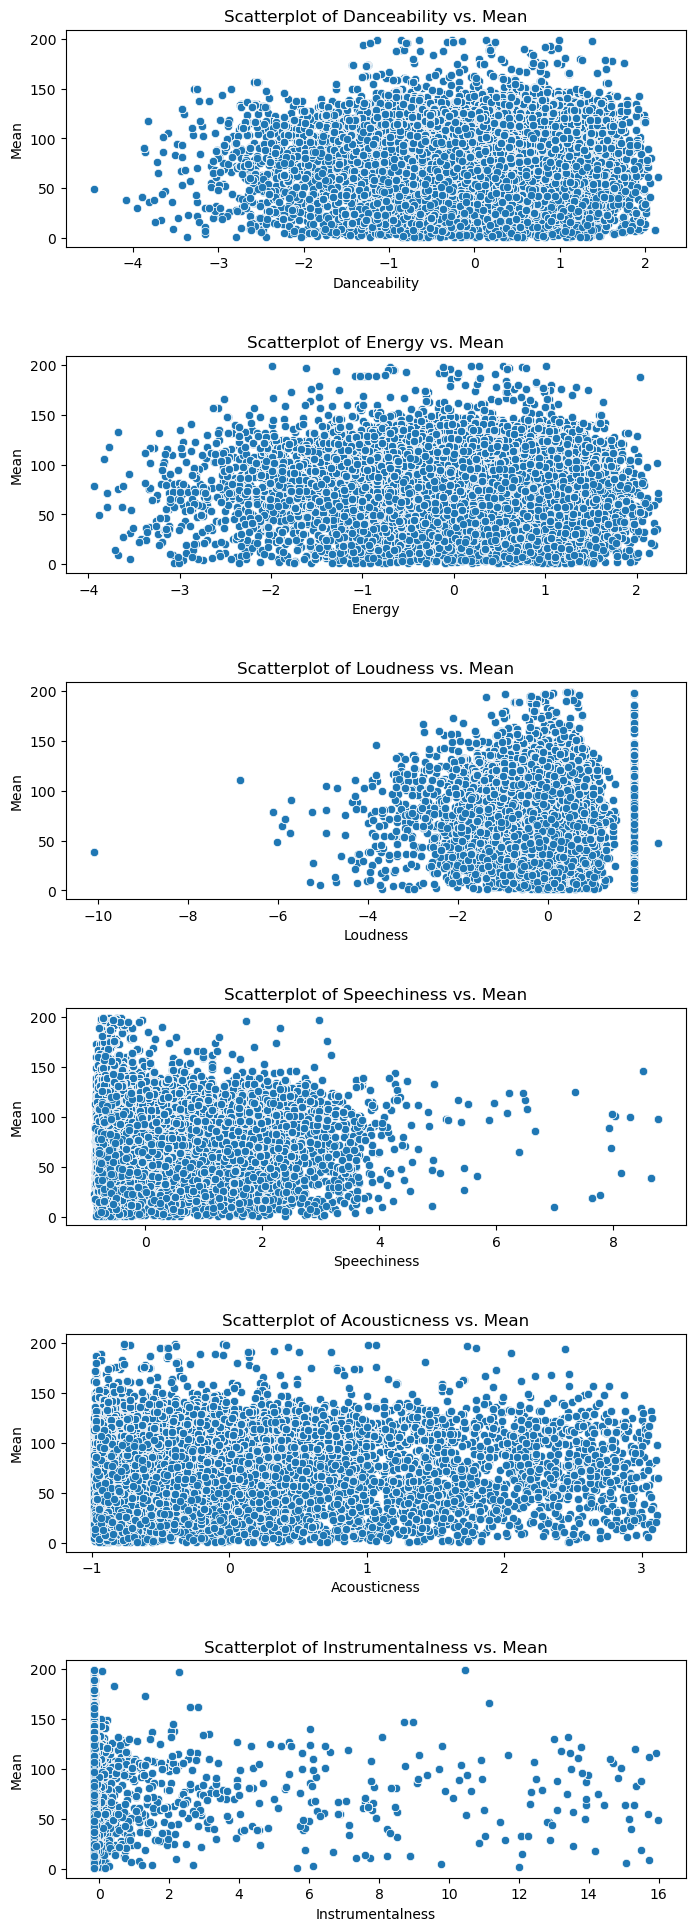

In [61]:
num_plots = len(predictors)

# Create subplots for scatterplots
fig, axes = pyplot.subplots(num_plots, 1, figsize=(8, 4 * num_plots))
fig.subplots_adjust(hspace=0.5)

# Create scatterplots for each predictor against the target
for i, predictor in enumerate(predictors):
    sns.scatterplot(x=predictor, y=target, data=result_df, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {predictor} vs. {target}')


/home/sbochman/miniconda3/envs/aml/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: module 'matplotlib' has no attribute 'show'

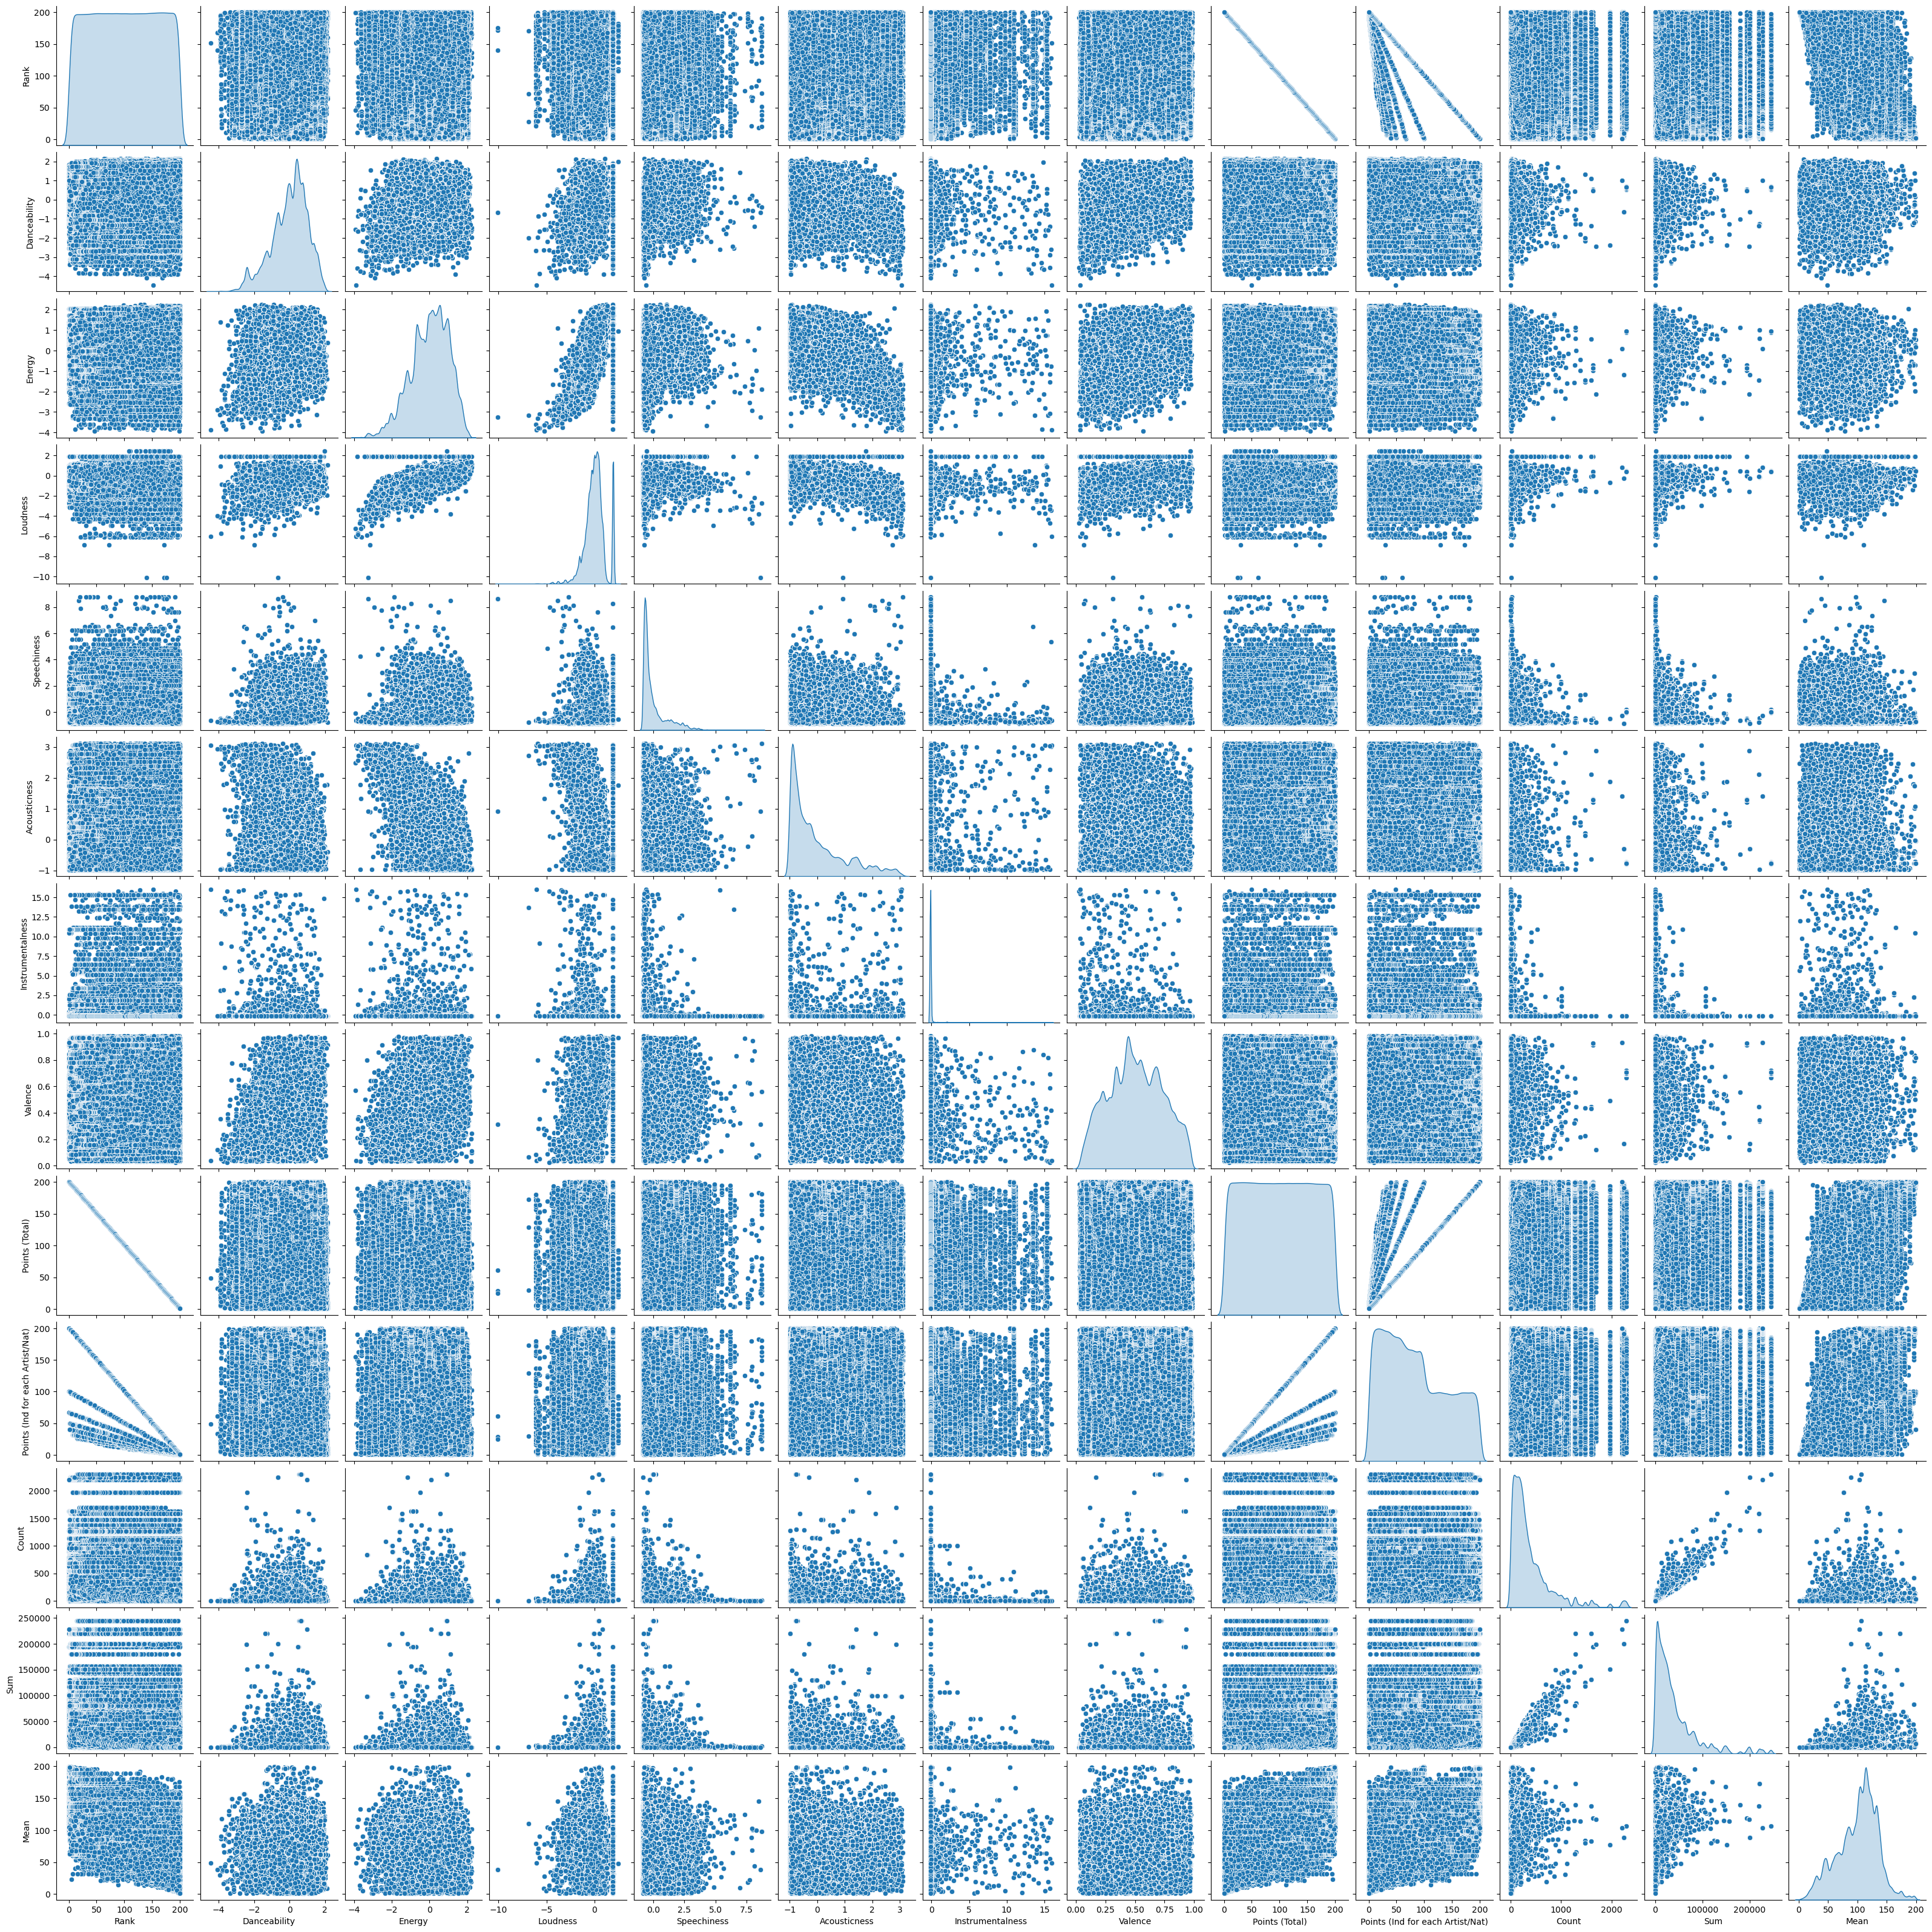

In [63]:
sns.pairplot(result_df, diag_kind='kde')
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = model.predict(X_test)


In [67]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R2 value:", r_squared)

Root Mean Squared Error: 33.82646337448295
R2 value: 0.012608363263336697


# Random Forest

In [84]:
estimator = [10, 50, 100, 200, 300, 400, 500, 1000]

r = []

for estimat in estimator:
    model = RandomForestRegressor(n_estimators=estimat, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r.append(r2_score(y_pred, y_test))



Text(0, 0.5, 'R2 value')

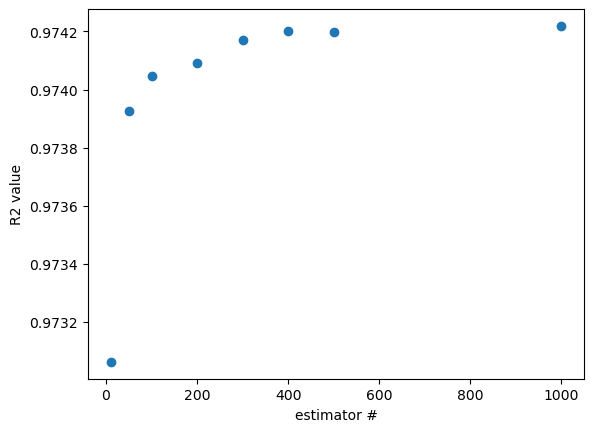

In [85]:
plt.scatter(estimator, r)
plt.xlabel("estimator #")
plt.ylabel("R2 value")

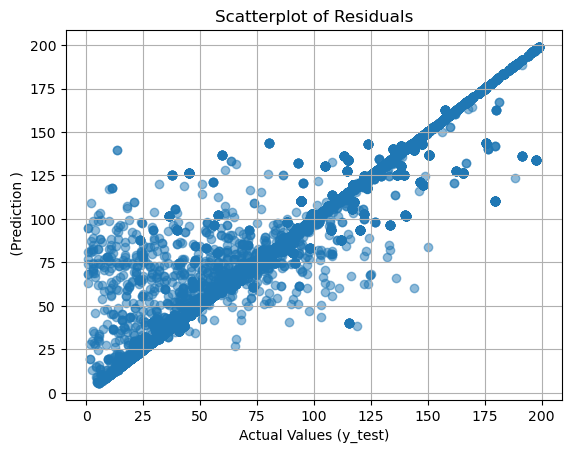

In [83]:
residuals = y_pred - y_test

# Create a scatterplot of the residuals
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel(' (Prediction )')
plt.title('Scatterplot of Residuals')
plt.grid(True)
plt.show()

In [81]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R2 value:", r_squared)

Root Mean Squared Error: 5.378089390434683
R2 value: 0.9750407064011105


(array([  423.,  1132.,  3199.,  5352.,  8949.,  8296., 14294., 12546.,
        13790., 16902., 17364., 20370., 26154., 24070., 27002., 44110.,
        39187., 47181., 39052., 32429., 28463., 14400.,  8702.,  4460.,
         3153.,  2874.,  2436.,  1212.,  1432.,  1471.]),
 array([  1.        ,   7.60155039,  14.20310078,  20.80465116,
         27.40620155,  34.00775194,  40.60930233,  47.21085271,
         53.8124031 ,  60.41395349,  67.01550388,  73.61705426,
         80.21860465,  86.82015504,  93.42170543, 100.02325581,
        106.6248062 , 113.22635659, 119.82790698, 126.42945736,
        133.03100775, 139.63255814, 146.23410853, 152.83565891,
        159.4372093 , 166.03875969, 172.64031008, 179.24186047,
        185.84341085, 192.44496124, 199.04651163]),
 <BarContainer object of 30 artists>)

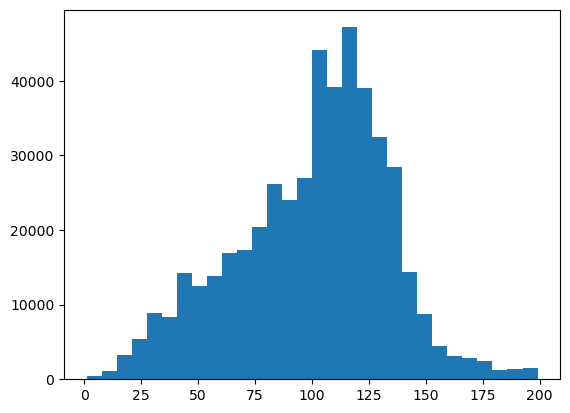

In [87]:

plt.hist(result_df['Mean'], bins = 30)